# Pandas


## Overview

[Pandas](http://pandas.pydata.org/) is a package of fast, efficient data analysis tools for Python.

Its popularity has surged in recent years, coincident with the rise
of fields such as data science and machine learning.
 
Just as [NumPy](http://www.numpy.org/) provides the basic array data type plus core array operations, pandas

1. defines fundamental structures for working with data and  
1. endows them with methods that facilitate operations such as  
  
  - reading in data  
  - adjusting indices  
  - working with dates and time series  
  - sorting, grouping, re-ordering and general data munging <sup><a href=#mung id=mung-link>[1]</a></sup>  
  - dealing with missing values, etc., etc.  

More sophisticated statistical functionality is left to other packages, such
as [statsmodels](http://www.statsmodels.org/) and [scikit-learn](http://scikit-learn.org/), which are built on top of pandas.

We start by importing the usual machine learning libraries.

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Series

Two important data types defined by pandas are  `Series` and `DataFrame`.

You can think of a `Series` as a “column” of data, such as a collection of observations on a single variable.

Let’s start with a Series example

Mark Hogan 20098168

In [236]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    1.123533
1   -1.180465
2    0.775931
3    1.093575
Name: daily returns, dtype: float64

Here you can imagine the indices `0, 1, 2, 3` as indexing four listed
companies, and the values being daily returns on their shares.

Pandas `Series` are built on top of NumPy arrays and support many similar
operations,

But `Series` provide more than NumPy arrays.

Not only do they have some additional (statistically oriented) methods

In [237]:
s.describe()

count    4.000000
mean     0.453144
std      1.100370
min     -1.180465
25%      0.286832
50%      0.934753
75%      1.101065
max      1.123533
Name: daily returns, dtype: float64

But their index values do not need to be numbers, as is the case with numpy arrays.

Viewed in this way, `Series` are like fast, efficient Python dictionaries
(with the restriction that the items in the dictionary all have the same
type—in this case, floats).

1. How can I set the index to be 'AMZN', 'AAPL', 'MSFT', 'GOOG' (in that order?)
2. How can you pick out the `AMZN` value from the series?
3. How can you check that `AAPL` is included in the series?
4. I learn that there is a problem with the data source. How can I set the `GOOG` return to an unknown value?
5. How can I find the return with the highest value?
6. If I wanted to include the city in the index, how could this be done?

here im setting the index for each value

In [238]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    1.123533
AAPL   -1.180465
MSFT    0.775931
GOOG    1.093575
Name: daily returns, dtype: float64

Here im getting the value for AMZN

In [239]:
a = s.loc['AMZN']
a

1.1235331600925977

this checks if AAPL exists

In [240]:
'AAPL' in s.index

True

This sets GOOG to a empty value using np.nan which dosent affect the data type for getting .max()

In [241]:
n = s.loc['GOOG'] = np.nan
n

nan

this gets the highest value in the series

In [242]:
a = s.max()
a

1.1235331600925977

This is adding to each index a country

In [243]:
cities = ['Dublin', 'New York', 'Paris', 'Rome']
s.index = s.index + " - " + pd.Index(cities)
s

AMZN - Dublin      1.123533
AAPL - New York   -1.180465
MSFT - Paris       0.775931
GOOG - Rome             NaN
Name: daily returns, dtype: float64

## DataFrames

While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable.

A `DataFrame` is an object for storing related columns of data.

In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are naturally organized  into rows and columns, often with  descriptive indexes for individual rows and individual columns.

Here’s the content of `test_pwt.csv`

```text
"country","country isocode","year","POP","XRAT","tcgdp","cc","cg"
"Argentina","ARG","2000","37335.653","0.9995","295072.21869","75.716805379","5.5788042896"
"Australia","AUS","2000","19053.186","1.72483","541804.6521","67.759025993","6.7200975332"
"India","IND","2000","1006300.297","44.9416","1728144.3748","64.575551328","14.072205773"
"Israel","ISR","2000","6114.57","4.07733","129253.89423","64.436450847","10.266688415"
"Malawi","MWI","2000","11801.505","59.543808333","5026.2217836","74.707624181","11.658954494"
"South Africa","ZAF","2000","45064.098","6.93983","227242.36949","72.718710427","5.7265463933"
"United States","USA","2000","282171.957","1","9898700","72.347054303","6.0324539789"
"Uruguay","URY","2000","3219.793","12.099591667","25255.961693","78.978740282","5.108067988"
```

Note that `POP` is the population of the country (in thousands) and `tcgdp` is the GDP of the
country (in millions of USD).


1. Supposing you have this data saved as `test_pwt.csv` in data directory , how can you read it into a data frame `df`?
2. How can we use `.iloc` to extract rows 3 to 8 and columns 1 to 5, inclusive?
3. How can we use df.index and df.loc to select rows 3 to 8 and both the country and tcgdp columns?
4. How do use the `country` variable as the index in this dataframe?
5. How can we rename `POP` to `population` and `tcgdp` to `total GDP`?
6. The population is in 1000s, how can we convert that to single units (persons in this case)?
7. Which countries have a `population` greater than 20 million?
8. How can we add a column `GDP per capita` showing real GDP per capita, in dollars per person?
9. Grouping the countries into "large" (> 20 million) and "small" (<= 20 million), what is the mean GDP per capita for each category?

This reads in test_pwt csv file into a dataframe and then displays the rows 3 to 8 and columns 1 to 5

In [244]:
df = pd.read_csv('data/test_pwt.csv')
s = df.iloc[2:8, 0:5]

this displays the countrys and tcgdp rows 3 to 8

In [245]:
df.loc[df.index[3:9], ['country', 'tcgdp']]

,country,tcgdp
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


here we are renaming the countries POP and tcgdp

In [246]:
df.rename(columns={'POP': 'population', 'tcgdp': 'total GDP'})

,country,country isocode,year,population,XRAT,total GDP,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


here we multiply each value in population by 1000 to get the amount of persons

In [247]:
df['POP'] = df['POP'] * 1000
df['POP']

0    3.733565e+07
1    1.905319e+07
2    1.006300e+09
3    6.114570e+06
4    1.180150e+07
5    4.506410e+07
6    2.821720e+08
7    3.219793e+06
Name: POP, dtype: float64

This displays each country with under 20000000 million people

In [248]:
df[df['POP'] <= 20000000]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
1,Australia,AUS,2000,19053186.0,1.724830,541804.652100,67.759026,6.720098
3,Israel,ISR,2000,6114570.0,4.077330,129253.894230,64.436451,10.266688
4,Malawi,MWI,2000,11801505.0,59.543808,5026.221784,74.707624,11.658954
7,Uruguay,URY,2000,3219793.0,12.099592,25255.961693,78.978740,5.108068


this divides the GDP of each country by the populatiuon to get the gdp of each individual person

In [249]:
df['GDP percap'] = df['tcgdp'] / df['POP']
df.head()


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg,GDP percap
0,Argentina,ARG,2000,3.733565e+07,0.999500,2.950722e+05,75.716805,5.578804,0.007903
1,Australia,AUS,2000,1.905319e+07,1.724830,5.418047e+05,67.759026,6.720098,0.028436
2,India,IND,2000,1.006300e+09,44.941600,1.728144e+06,64.575551,14.072206,0.001717
3,Israel,ISR,2000,6.114570e+06,4.077330,1.292539e+05,64.436451,10.266688,0.021139
4,Malawi,MWI,2000,1.180150e+07,59.543808,5.026222e+03,74.707624,11.658954,0.000426


this gets the mean value of the GDP per captial of the countries over and under 20000000 million people

In [250]:
s = df[df['POP'] > 20000000]['GDP percap']
l = df[df['POP'] < 20000000]['GDP percap']
"largest: ", l.mean(), "smallest: ", s.mean()

('largest: ', 0.01446124332705511, 'smallest: ', 0.012435895835851021)

One of the nice things about pandas `DataFrame` and `Series` objects is that they have methods for plotting and visualization that work through Matplotlib.

For example, we can easily generate a bar plot of GDP per capita

this displays a bar chart of the gdp per capita for each country by creating a variable and polting the gdp percap of each country

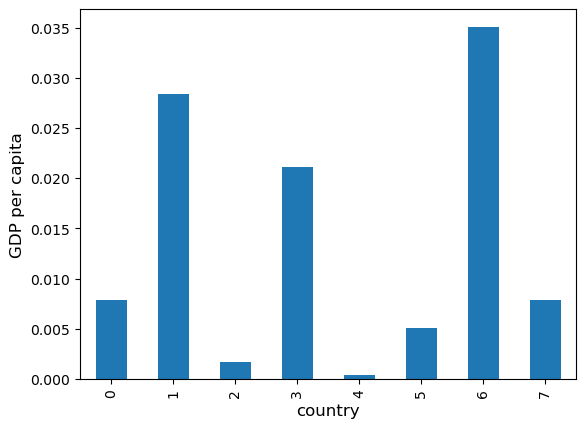

In [251]:
# Note that the following code will generate errors (e.g. `df` is not defined) unless the previous tasks have been completed
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

10. At the moment the data frame is ordered alphabetically on the countries. How can we use `sort_values()` to order it by `GDP per capita`?

In [252]:
df = df.sort_values('GDP percap', ascending=True)

11. Now create a new plot, with the countries sorted by GDP per capita. 

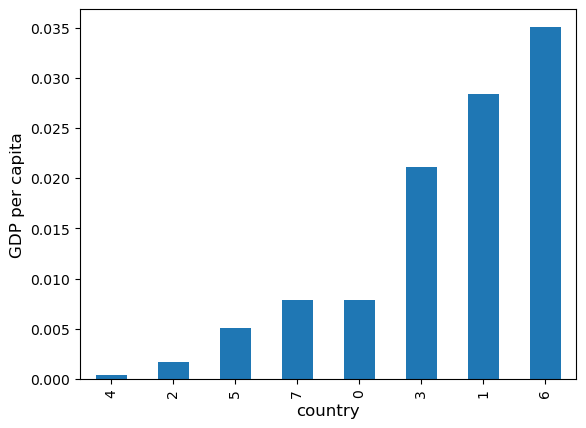

In [253]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

12. Which plot do you prefer, and why?

The Second Plot because it shows a trend in GDP per capita per country